# Planewaves in Homogeneous Media

The eigenmode source can also be used to launch [planewaves](https://en.wikipedia.org/wiki/Plane_wave) in homogeneous media. The dispersion relation for a planewave is ω=|$\vec{k}$|/$n$ where ω is the angular frequency of the planewave and $\vec{k}$ its wavevector; $n$ is the refractive index of the homogeneous medium. This example demonstrates launching planewaves in a uniform medium with $n$ of 1.5 at three rotation angles: 0°, 20°, and 40°. Bloch-periodic boundaries via the `k_point` are used and specified by the wavevector $\vec{k}$. PML boundaries are used only along the x-direction.

First, we'll load our necesarry modules:

In [63]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

Next, we'll create a function we can call multiple times that runs the simulation for different rotation angles:

In [64]:
def run_sim(rot_angle=0):

    resolution = 25  # pixels/μm

    sx = 12
    sy = 16
    cell_size = mp.Vector3(sx, sy, 0)  # for 2D


    pml_layers = [mp.PML(thickness=2, direction=mp.Y)]

    fsrc = 1.0  # frequency of planewave (wavelength = 1/fsrc)

    n = 1  # refractive index of homogeneous material
    default_material = mp.Medium(index=n)

    k_point = mp.Vector3(y=-fsrc * n).rotate(mp.Vector3(z=1), rot_angle)

    geometry1 = [
        mp.Block(
            center=mp.Vector3(0, -sy/4),              # centered halfway down
            size=mp.Vector3(mp.inf, sy/2, mp.inf),    # fill y < 0
            material=mp.Medium(epsilon=2.56)
        )
    ]


    geometry2 = [
    mp.Cylinder(
        radius=1.0,
        height=mp.inf,                     # for 2D: extend infinitely in z
        center=mp.Vector3(0, 1),           # center at (0, 1)
        material=mp.Medium(epsilon=2.56)    # dielectric with ε=4 (or use mp.metal for PEC)
    )
    ]



    sources = [
        mp.EigenModeSource(
            src=mp.ContinuousSource(fsrc),
            center=mp.Vector3(0,6),
            size=mp.Vector3(x=12),
            direction=mp.AUTOMATIC if rot_angle == 0 else mp.NO_DIRECTION,
            eig_kpoint=k_point,
            eig_band=1,
            eig_parity=mp.EVEN_Y + mp.ODD_Z if rot_angle == 0 else mp.ODD_Z,
            eig_match_freq=True,
        )
    ]

    sim = mp.Simulation(
        cell_size=cell_size,
        resolution=resolution,
        geometry = geometry1 + geometry2,
        boundary_layers=pml_layers,
        sources=sources,
        k_point=k_point,
        default_material=default_material,
        symmetries=[mp.Mirror(mp.Y)] if rot_angle == 0 else [],
    )

    sim.run(until=100)

    plt.figure(dpi=100)
    sim.plot2D(fields=mp.Ez)
    plt.show()

Next we'll iterate over three rotation angles and plot their steady-state fields profiles. Residues of the backward-propagating waves due to the discretization are slightly visible.

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00250101 s
Working in 2D dimensions.
Computational cell is 12 x 16 x 0 with resolution 25
     block, center = (0,-4,0)
          size (1e+20,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.56,2.56,2.56)
     cylinder, center = (0,1,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.56,2.56,2.56)
time for set_epsilon = 0.102351 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0,-1,0) = 1 after 65 iters
run 0 finished at t = 100.0 (5000 timesteps)
     block, center = (0,-4,0)
          size (1e+20,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.56,2.56,2.56)
     cylinder, center = (0,1,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.56,2

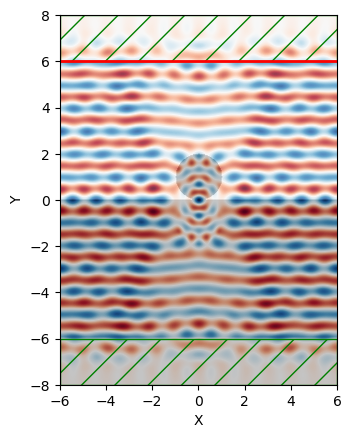

-----------
Initializing structure...
time for choose_chunkdivision = 5.88894e-05 s
Working in 2D dimensions.
Computational cell is 12 x 16 x 0 with resolution 25
     block, center = (0,-4,0)
          size (1e+20,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.56,2.56,2.56)
     cylinder, center = (0,1,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.56,2.56,2.56)
time for set_epsilon = 0.202799 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0.34202,-0.939693,0) = 1 after 61 iters
Meep progress: 45.92/100.0 = 45.9% done in 4.0s, 4.7s to go
on time step 2296 (time=45.92), 0.00174242 s/step
Meep progress: 89.5/100.0 = 89.5% done in 8.0s, 0.9s to go
on time step 4475 (time=89.5), 0.00183642 s/step
run 0 finished at t = 100.0 (5000 timesteps)
     block, center = (0,-4,0)
          size (1e+20,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielec

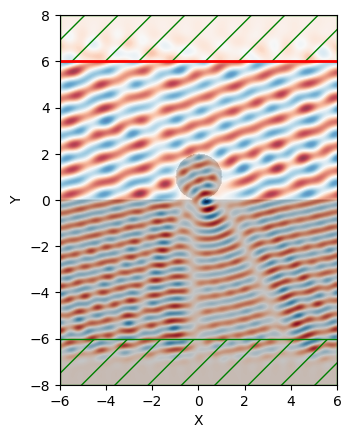

-----------
Initializing structure...
time for choose_chunkdivision = 5.88894e-05 s
Working in 2D dimensions.
Computational cell is 12 x 16 x 0 with resolution 25
     block, center = (0,-4,0)
          size (1e+20,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.56,2.56,2.56)
     cylinder, center = (0,1,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.56,2.56,2.56)
time for set_epsilon = 0.20877 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0.707107,-0.707107,0) = 1 after 47 iters
Meep progress: 45.84/100.0 = 45.8% done in 4.0s, 4.7s to go
on time step 2292 (time=45.84), 0.00174541 s/step
Meep progress: 93.96000000000001/100.0 = 94.0% done in 8.0s, 0.5s to go
on time step 4699 (time=93.98), 0.00166204 s/step
run 0 finished at t = 100.0 (5000 timesteps)
     block, center = (0,-4,0)
          size (1e+20,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
  

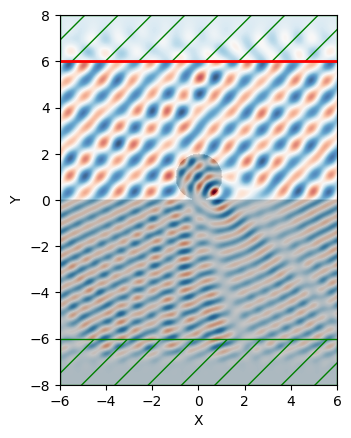

-----------
Initializing structure...
time for choose_chunkdivision = 7.10487e-05 s
Working in 2D dimensions.
Computational cell is 12 x 16 x 0 with resolution 25
     block, center = (0,-4,0)
          size (1e+20,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.56,2.56,2.56)
     cylinder, center = (0,1,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.56,2.56,2.56)
time for set_epsilon = 0.217278 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0.866025,-0.5,0) = 1 after 35 iters
Meep progress: 47.800000000000004/100.0 = 47.8% done in 4.0s, 4.4s to go
on time step 2390 (time=47.8), 0.00167401 s/step
Meep progress: 95.16/100.0 = 95.2% done in 8.0s, 0.4s to go
on time step 4758 (time=95.16), 0.00169012 s/step
run 0 finished at t = 100.0 (5000 timesteps)
     block, center = (0,-4,0)
          size (1e+20,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
      

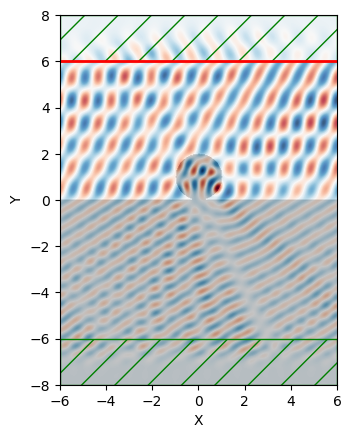

-----------
Initializing structure...
time for choose_chunkdivision = 8.29697e-05 s
Working in 2D dimensions.
Computational cell is 12 x 16 x 0 with resolution 25
     block, center = (0,-4,0)
          size (1e+20,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.56,2.56,2.56)
     cylinder, center = (0,1,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.56,2.56,2.56)
time for set_epsilon = 0.215166 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0.996195,-0.0871557,0) = 1 after 10 iters
Meep progress: 45.96/100.0 = 46.0% done in 4.0s, 4.7s to go
on time step 2298 (time=45.96), 0.00174081 s/step
Meep progress: 94.36/100.0 = 94.4% done in 8.0s, 0.5s to go
on time step 4719 (time=94.38), 0.00165271 s/step
run 0 finished at t = 100.0 (5000 timesteps)
     block, center = (0,-4,0)
          size (1e+20,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          di

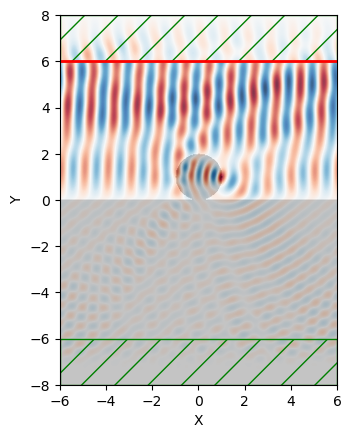

In [65]:
for rot_angle in np.radians([0, 20, 45, 60, 85]):
    run_sim(rot_angle)

Note that this example involves a `ContinuousSource` for the time profile. For a pulsed source, the oblique planewave is incident at a given angle for only a *single* frequency component of the source. This is a fundamental feature of FDTD simulations and not of Meep per se. Thus, to simulate an incident planewave at multiple angles for a given frequency ω, you will need to do separate simulations involving different values of $\vec{k}$ (`k_point`) since each set of ($\vec{k}$,ω) specifying the Bloch-periodic boundaries and the frequency of the source will produce a different angle of the planewave. For more details, refer to Section 4.5 ("Efficient Frequency-Angle Coverage") in [Chapter 4](https://arxiv.org/abs/1301.5366) ("Electromagnetic Wave Source Conditions") of [Advances in FDTD Computational Electrodynamics: Photonics and Nanotechnology](https://www.amazon.com/Advances-FDTD-Computational-Electrodynamics-Nanotechnology/dp/1608071707).